230822 노드복습

In [2]:
path='/aiffel/aiffel/data_analysis_basic/data/'

In [3]:
# Pandas와 Matplotlib를 호출
import pandas as pd
import matplotlib.pyplot as plt

# Sales Data를 변수명 SalesLog에 할당
SalesLog = pd.read_csv('/aiffel/aiffel/data_analysis_basic/data/Sales.csv')
SalesLog

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325
...,...,...,...,...,...,...
99840,2022-03-27,2022-03-27,SoccerManager,install,0,dicta630
99841,2022-03-28,2022-03-28,SoccerManager,install,0,tempora976
99842,2022-03-26,2022-03-26,SoccerManager,install,0,iusto840
99843,2022-03-20,2022-03-20,SoccerManager,install,0,nemo273


In [4]:
# SalesLog 정보 확인
SalesLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


Sales 데이터를 살펴보니 총 여섯 개 컬럼이 발견되었습니다.

고객들이 게임을 설치한 일자(install)
최종 로그기록(Time_stamp)
게임명(Game_Name)
상태(Status)
결제금액(Payment)
유저 아이디(Customer_ID)

In [5]:
# 결제된 금액 총액 계산하기
SalesLog['Payment'].sum()

144443100

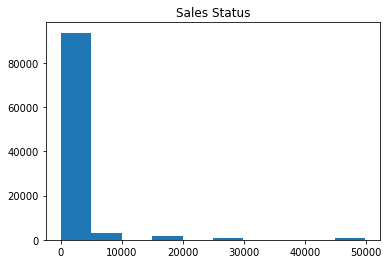

In [6]:
# 결제 금액을 히스토그램으로 그리기
plt.hist(SalesLog['Payment'])
plt.title('Sales Status')
plt.show()

무과금을 빼고 다시 한번 히스토그램을 그려보겠습니다.
먼저 결제금액이 0원이 아닌 경우만 골라서 
변수 Sales에 할당한 후 히스토그램을 그려 봅시다.

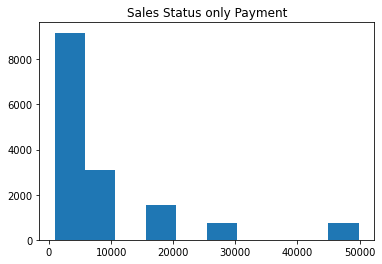

In [9]:
# 결제금액이 0원이 아닌 경우만 골라내서 Sales 변수에 할당
Sales = SalesLog[SalesLog['Payment']!=0]
# Sales

# 결제 금액을 히스토그램으로 그리기
plt.hist(Sales['Payment'])
plt.title('Sales Status only Payment')
plt.show()

이번에는 Box Plot을 통해 결제 금액의 사분위수를 확인해보겠습니다.
describe() 함수를 사용하면 데이터의 기술 통계량을 쉽게 확인할 수 있습니다.

In [10]:
# 결제금액의 기술통계량 확인하기
Sales['Payment'].describe()

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

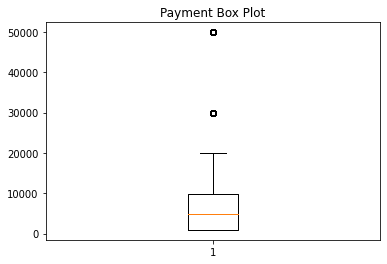

In [11]:
plt.boxplot(Sales['Payment'])
plt.title('Payment Box Plot')
plt.show()

o 두개는 이상치 (도움이 안됨)

결제금액의 최솟값은 900원, IQ1(25%)값도 900원, IQ2(중위 값)값은 4,900원이군요.
평균 결제금액은 9,435원으로 분석되었습니다. (위의 기술통계량 결과를 통해 구체적인 값을 확인할 수 있습니다.)

최솟값과 최대값이 각각 900원과 49,990원인것을 고려하면 상대적으로 적은 금액을 결제하는 고객이 정말 많은 것 같습니다.

In [17]:
Sales['Payment'].value_counts()/len(Sales['Payment'])

900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: Payment, dtype: float64

실제로 900원 결제 건수는 전체의 약 35%,
4,900원 결제 건수는 전체의 약 24%로
두 금액 결제 건수의 합이 전체의 약 70% 수준이나 됩니다.

이번에는 월별 결제금액을 한번 확인해보겠습니다.

여기서 잠깐🤚
월별로 결제금액을 집계하기 위해서는 groupby()라는 함수가 사용됩니다. groupby()는 pandas의 데이터프레임 중 특정 열을 기준으로 집계할 수 있습니다. 아래 코드는 순서대로 한번 읽어보면 다음과 같습니다. 'SalesLog의 Payment의 값을 SalesLog의 Month를 기준으로 집계한 값을 보여줘' 라는 의미입니다.

In [18]:
# SalesLog에 Month열을 만들고, 월별 날짜값을 입력(.str로 인덱싱(오브젝트만됨)/ 데이터프레임에대한 열값 지정)
SalesLog['Month'] = SalesLog['Time_stamp'].str[:7]
# SalesLog

# 월별 결제금액 확인하기
SalesLog['Payment'].groupby(SalesLog['Month']).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

2월과 3월 결제금액을 구체적으로 살펴보겠습니다
막대 그래프를 통해 시각적으로 확인해 볼까요?

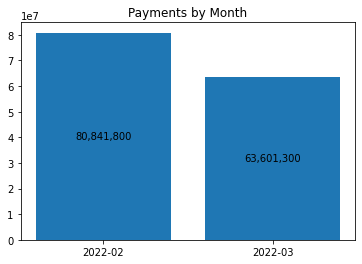

In [19]:
temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
# (안에 수치적어 - label 지정/ .0f (소수점에 대한 , 숫자 중간에,))
plt.bar_label(ax, labels=[f'{i:,}' for i in temp_data], label_type='center')

# plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

Sales02변수를 만들고, 2월에 결제한 데이터 할당해 봅시다. 무과금은 제외한다는 것을 잊지 마세요!

In [20]:
# Sales02변수를 만들고, 2월에 결제한 데이터 할당하기
Sales02 = SalesLog[(SalesLog['Month'] == '2022-02') & (SalesLog['Payment'] != 0)]
Sales02

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
12168,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
12169,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
12170,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
12171,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


In [21]:
# 시각화를 위한 인덱스 정렬하기
Sales02.reset_index(drop=True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
8537,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
8538,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
8539,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
8540,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


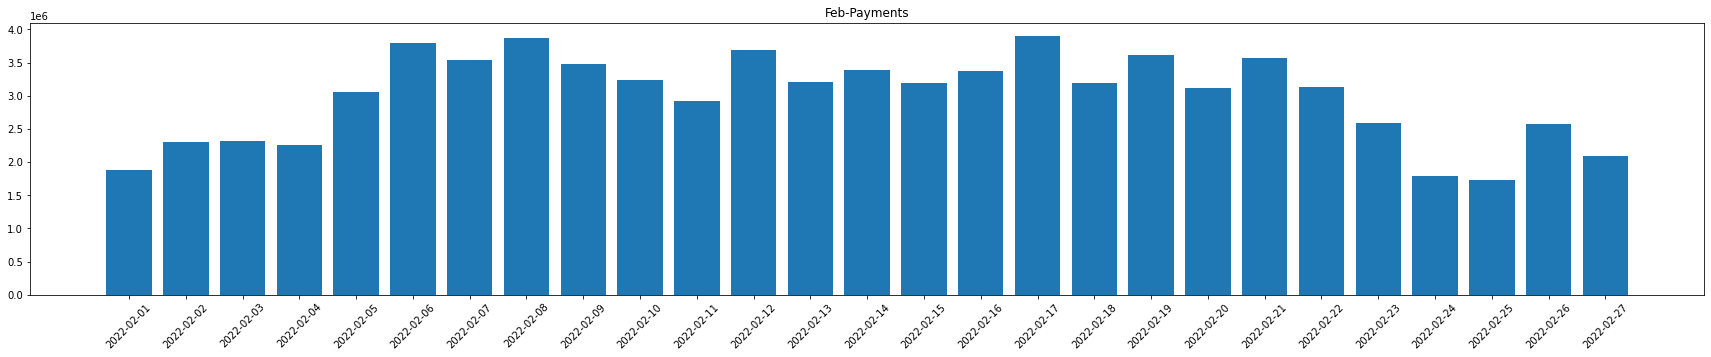

In [22]:
# 2월에 결제한 데이터를 날짜순으로 정렬한 후, 막대 그래프를 그려 봅시다.

# le6 (Y단위에 대한 설명 Y축에서 6개의 단위가 생략되어있음)
# Sales02변수를 만들고, 2월에 결제한 데이터 할당하기
Sales02 = SalesLog[(SalesLog['Month'] == '2022-02') & (SalesLog['Payment'] != 0)]
Sales02
# 2월에 결제한 데이터 시각화하기
temp_data = Sales02['Payment'].groupby(Sales02['Time_stamp']).sum()
# temp_data
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45) #회전
plt.show()

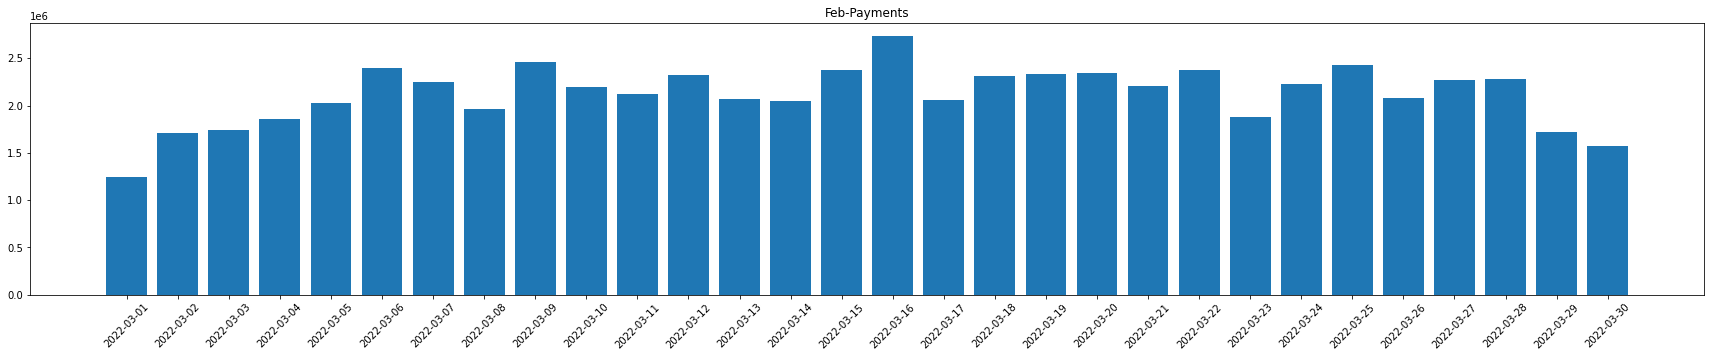

In [23]:
# 이번에는 3월에 결제한 데이터를 시각화해봅시다. 아래의 빈칸에 코드를 작성해 보세요.

# Sales03변수를 만들고, 3월에 결제한 데이터 할당하기
Sales03 = SalesLog[(SalesLog['Month'] == '2022-03') & (SalesLog['Payment'] != 0)]
Sales03

# 시각화를 위한 인덱스 정렬하기
# Sales03.reset_index(drop=True)

# 3월에 결제한 데이터 시각화하기
temp_data = Sales03['Payment'].groupby(Sales03['Time_stamp']).sum()
# temp_data
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45) #회전
plt.show()

지금까지는 Sales 데이터를 살펴봤으니 Customer 데이터를 살펴보겠습니다.

In [16]:
CustomerLog = pd.read_csv('/aiffel/aiffel/data_analysis_basic/data/customer.csv')
print(CustomerLog)

CustomerLog.info()

          Customer_ID Name     Nickname  Password  \
0          facilis140  이영순         quos  ********   
1          debitis994  김중수    molestiae  ********   
2         possimus246  양은경          rem  ********   
3        occaecati138  백도윤       libero  ********   
4         corrupti325  김영수   temporibus  ********   
...               ...  ...          ...       ...   
99840        dicta630  김예지          sit  ********   
99841      tempora976  문은경         modi  ********   
99842        iusto840  강중수        iusto  ********   
99843         nemo273  황정남     deleniti  ********   
99844  consequatur371  이영식  accusantium  ********   

                              Email       Birth  Gender              C.P.  \
0                   coejongsu@yu.kr  1989-03-11  female  01x9-4x625-x5x3x   
1                   jiweon02@ju.org  1995-11-19    male  01x9-3x228-x3x9x   
2           coesubin@jusighoesa.com  2005-12-24  female  01x9-7x873-x2x2x   
3            yeongceol80@gangryu.kr  2003-02-09  female

이번에는 파이그래프를 사용하려고 합니다. 
먼저 고객 성별에 따른 파이 그래프를 그려 볼게요. customer 데이터에서 'Gender' 컬럼을 groupby()사용해 성별로 묶어준 후 파이 그래프를 그립니다.

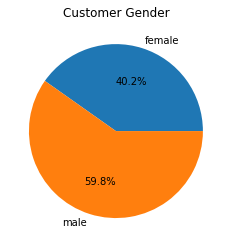

In [24]:
# 고객 성별에 따른 파이그래프 그리기 (이름별로 묶기위해)
pie_data = CustomerLog.groupby(['Gender']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer Gender')
plt.show()

In [25]:
# 이번에는 고객 모바일 서비스 기업과 고객 모바일OS에 따른 파이그래프를 여러분이 그려보세요.

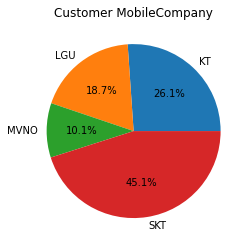

In [26]:
pie_data = CustomerLog.groupby(['MobileCompany']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer MobileCompany')
plt.show()

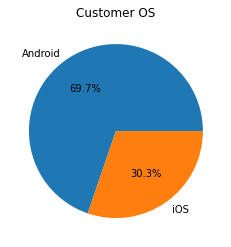

In [27]:
# 고객 모바일 서비스 기업에 따른 파이그래프 그리기

pie_data = CustomerLog.groupby(['OS']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer OS')
plt.show()

이번에는 결제 경험이 있는 고객들만을 골라서 똑같은 시각화를 수행해보겠습니다.
데이터 결합
merge() 함수를 사용해 Customer 데이터와 Sales 데이터를 결합해 봅시다.

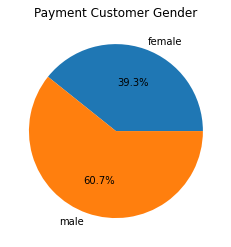

In [28]:
# merge() 함수를 사용해 Customer 데이터와 Sales 데이터를 결합해 봅시다.
# Customer 데이터와 Sales 데이터를 결합하기
TotalData = pd.merge(CustomerLog, SalesLog)

# 결제 경험이 있는 고객들만 골라내기 (무과급유저 빼고 뽑기)
PaymentCustomer = TotalData[(TotalData["Payment"] != 0)]

# 결제 경험이 있는 고객 성별에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['Gender']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer Gender')
plt.show()

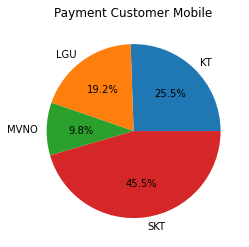

In [29]:
# "결제 경험이 있는" 고객 모바일 서비스 기업에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['MobileCompany']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer Mobile')
plt.show()

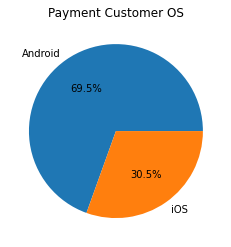

In [30]:
# 결제 경험이 있는 고객 모바일OS에 따른 파이그래프 그리기 
pie_data = PaymentCustomer.groupby(['OS']).count().Name         #(이름을 기준으로 카운팅)
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer OS')
plt.show()

고객 성별에 따른 결제금액을 월별로 한번 관찰해보겠습니다.
월별 고객
이제부터는 여러분이 직접 코드를 작성해 보세요. 위에서 배운 내용을 살짝 응용하면 쉽게 하실 수 있을 거에요.

먼저 월별 고객 성별에 따른 결제 금액을 확인하겠습니다. 결제 금액이 있는 고객만 추려낸 PaymentCustomer 데이터에서 'Gender'와 'Month'를 묶은 후 각 값을 합해보세요.

In [31]:
# Hint! groupyby()과 sum()을 사용해 봅시다.
a = PaymentCustomer['Payment'].groupby([PaymentCustomer['Gender'], PaymentCustomer['Month']]).sum()
b = pd.DataFrame(a)
b

Payment
Gender Month            
female 2022-02  32103200
       2022-03  25295700
male   2022-02  48738600
       2022-03  38305600

이번에는 male과 female 변수를 만들고 성별에 따라 데이터를 할당해 봅시다.

In [32]:
# Hint! '=='를 사용해 봅시다.

male = PaymentCustomer[PaymentCustomer["Gender"] == "male"]
female = PaymentCustomer[PaymentCustomer["Gender"] == "female"]

male

,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,install,Time_stamp,Game_Name,Status,Payment,Month
1,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS,2022-01-05,2022-02-17,MineGround,play,29900,2022-02
4,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android,2022-01-08,2022-02-01,MineGround,play,900,2022-02
5,voluptate353,이진호,eum,********,di@yu.com,1999-02-01,male,01x9-8x635-x2x4x,SKT,iOS,2022-01-15,2022-02-18,MineGround,play,4900,2022-02
7,temporibus711,황수민,quis,********,sumingim@munyun.com,1983-07-05,male,01x9-5x894-x1x8x,MVNO,iOS,2022-01-17,2022-02-17,MineGround,play,900,2022-02
9,enim234,권순옥,harum,********,eunseo52@yuhanhoesa.com,2000-12-08,male,01x9-8x650-x3x2x,SKT,Android,2022-01-13,2022-02-22,MineGround,play,19900,2022-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15301,ab888,구서준,minus,********,lbag@gimbagbag.kr,1982-09-12,male,01x9-9x372-x0x4x,SKT,Android,2022-03-25,2022-03-28,SoccerManager,play,19900,2022-03
15302,necessitatibus192,백수민,nam,********,eunseo86@jangbag.kr,1990-12-28,male,01x9-6x726-x9x9x,SKT,iOS,2022-03-01,2022-03-02,SoccerManager,play,9900,2022-03
15303,quo334,이영숙,animi,********,seohyeongang@coeii.com,1986-11-15,male,01x9-9x909-x5x1x,KT,iOS,2022-03-01,2022-03-06,SoccerManager,play,19900,2022-03
15305,dignissimos737,김지혜,velit,********,gyeongsug96@yuhanhoesa.org,1982-03-23,male,01x9-8x355-x2x6x,SKT,iOS,2022-03-18,2022-03-20,SoccerManager,play,9900,2022-03


male과 female 변수를 만들고 성별에 따라 데이터를 할당
마지막으로 월별 여성과 남성 고객의 결제 금액을 각각의 막대그래프로 그려봅시다.

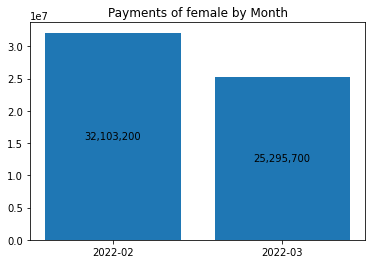

In [33]:
temp_data = female['Payment'].groupby(female['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments of female by Month')
plt.show()

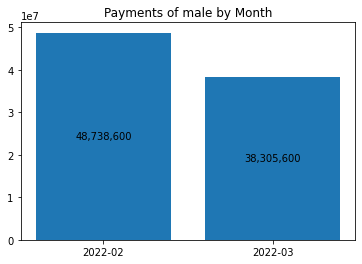

In [34]:
temp_data = male['Payment'].groupby(male['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
# plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.bar_label(ax, labels=[f'{i:,}' for i in temp_data], label_type='center')
plt.title('Payments of male by Month')
plt.show()